# Assigment Week 2-2

---

## Instacart?

kaggle instacart : https://www.kaggle.com/c/instacart-market-basket-analysis/data?


instacart : 미국의 장보기 서비스 업체

주문을 넣고 한시간만에 배달이 완료됨
<br>최소 구매금액이 10불 이상!
<br>빠른 속도와 편리함.. 리스펙..

Instacart의 data science 팀은 고객들의 즐거운 쇼핑 경험을 위해 그들이 어떤 식료품을 그 다음번 쇼핑 때 또 찾게될지, 또는 그다음 쇼핑 때 장바구니에 담기게 될 식료품은 어떤 것일지 예측하는 모델을 만드는 역할을 하고 있다고 함.

### data Description

3000,000 grocery orders from 200,000 users
<br> provied 4-100 of their orders (with the sequence)

Each entity (customer, product, order, aisle, etc.) has an associated unique id

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

---
## Load Data

* order_products_prior & order_products_train
    * These files specify which products were purchased in each order. 
    * 'reordered' indicates that the customer has a previous order that contains the product
* order
    * This file tells to which set (prior, train, test) an order belongs
    * 'order_dow' is the day of week.

In [54]:
#import all files
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products_prior = pd.read_csv("order_products__prior.csv")
# prior : 마지막 주문을 제외한 모든 주문
order_products_train = pd.read_csv("order_products__train.csv")
# train : 마지막 주문
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [55]:
print("<<< columns >>>")
print("aisles : " + str(aisles.columns)[6:-17])
print("departments : " + str(departments.columns)[6:-17])
print("order_products_prior : " + str(order_products_prior.columns)[6:-17])
print("order_products_train : " + str(order_products_train.columns)[6:-17])
print("orders : " + str(orders.columns)[6:-17])
print("products : " + str(products.columns)[6:-17])

<<< columns >>>
aisles : ['aisle_id', 'aisle']
departments : ['department_id', 'department']
order_products_prior : ['order_id', 'product_id', 'add_to_cart_order', 'reordered']
order_products_train : ['order_id', 'product_id', 'add_to_cart_order', 'reordered']
orders : ['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
    
products : ['product_id', 'product_name', 'aisle_id', 'department_id']


* order_products_prior, order_products_train, orders가 order_id를 공유한다

* user_id 정보가 들어있는 자료는 orders 뿐!

* orders의 order_number는 각 user의 주문한 순서를 알려준다
    <br> 같은 user의 마지막 주문이 order_number 최댓값

In [56]:
orders.eval_set.unique()
# orders의 eval_set column 에는 이 order가 어디 세트에 포함되어있는지가 적혀있다

array(['prior', 'train', 'test'], dtype=object)

In [57]:
print("aisles 종류 갯수 : " + str(aisles.count()[0]))
print("department 종류 갯수 : "+ str(departments.count()[0]))

aisles 종류 갯수 : 134
department 종류 갯수 : 21


In [58]:
print("order_products_prior 갯수 : " + str(order_products_prior.count()[0]))
print("order_products_train 갯수 : " + str(order_products_train.count()[0]))
print("")

order_products_prior 갯수 : 32434489
order_products_train 갯수 : 1384617



In [59]:
print("order의 갯수 : "+str(orders.count()[0]))
print("첫 주문 갯수 : "+str(orders.count()[0]-orders.count()[6]))
print("user의 갯수 : "+str(len(orders.user_id.unique())))

order의 갯수 : 3421083
첫 주문 갯수 : 206209
user의 갯수 : 206209


user의 갯수와 첫 주문의 갯수가 같다..! 

생각해보니 당연한 일이군.. 

---

## aisles

In [60]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


---

## departments

In [61]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


---

## order products

In [62]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [63]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [64]:
order_products_prior.order_id.unique()

array([      2,       3,       4, ..., 3421081, 3421082, 3421083])

In [65]:
order_products_train.order_id.unique()

array([      1,      36,      38, ..., 3421058, 3421063, 3421070])

### order_id

order_id 별 상품의 갯수를 파악해보자

In [66]:
product_per_order_prior = order_products_prior.groupby('order_id').count().product_id
product_per_order_train = order_products_train.groupby('order_id').count().product_id

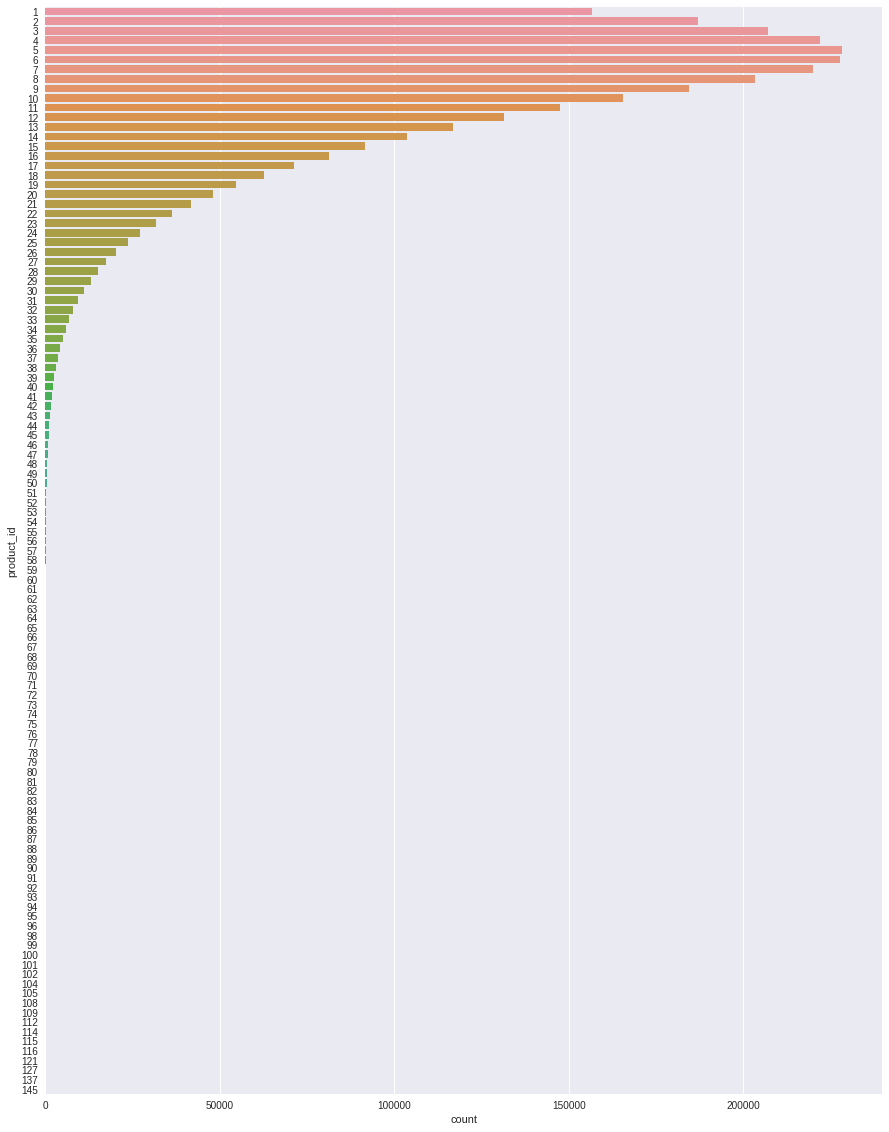

In [67]:
plt.subplots(figsize=(15,20))
sns.countplot(y = product_per_order_prior);
# g.set_xticklabels(rotation=30)

prior set에서는  한번 주문할때 4-7개의 product를 주문한 경우가 많았다

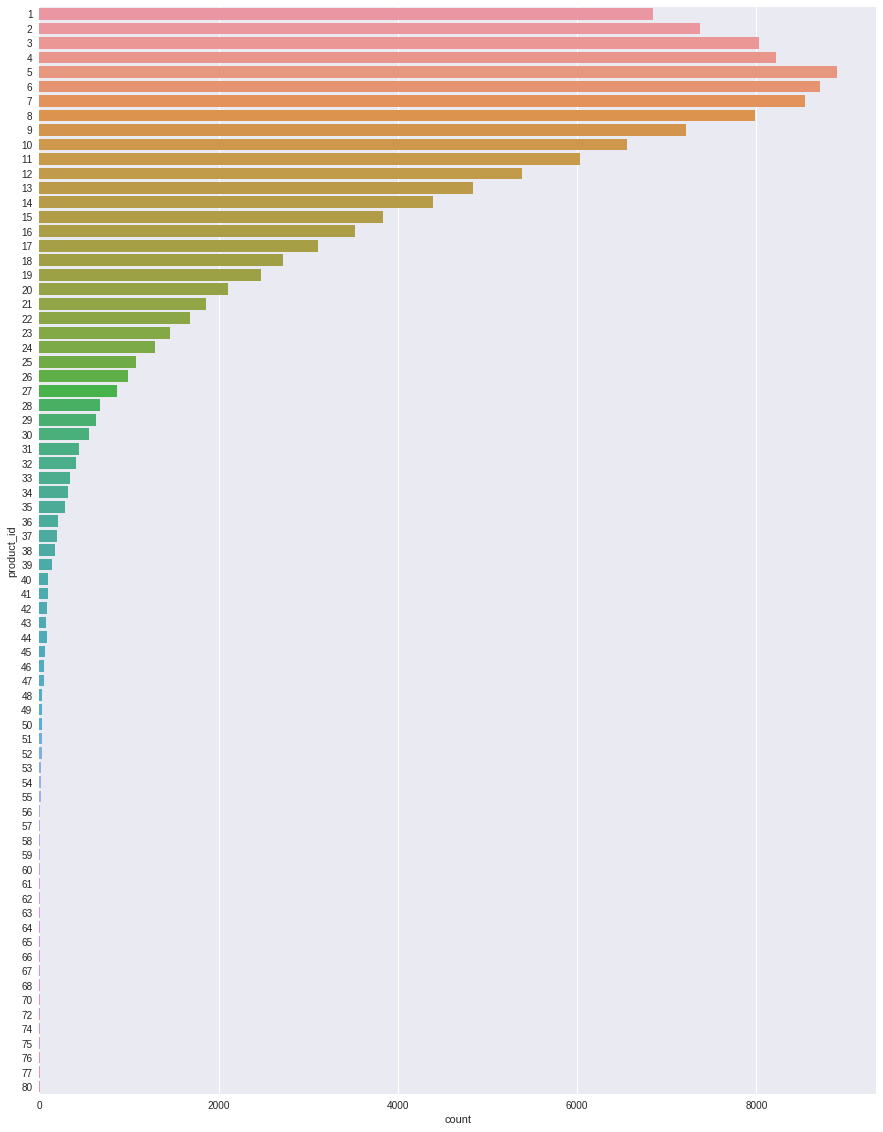

In [68]:
plt.subplots(figsize=(15,20))
sns.countplot(y = product_per_order_train);
# g.set_xticklabels(rotation=30)

train set에서도 마찬가지였으나, max값은 차이를 보였다
<br> train set의 데이터 수가 prior 데이터 수보다 작은 것이 이유로 보임

### reordered

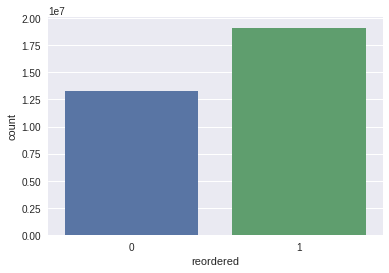

In [69]:
sns.countplot(order_products_prior.reordered);

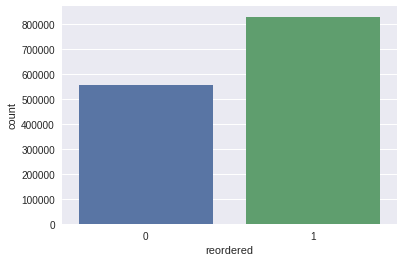

In [70]:
sns.countplot(order_products_train.reordered);

대충 reordered 되지 않은 것들과 reordered 된 상품의 갯수 차이가
<br> 2:3 정도인 것으로 보임

---

## orders

In [71]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


### order_dow

* 요일별 주문 횟수를 보자

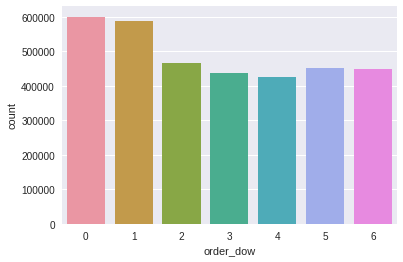

In [72]:
sns.countplot(orders.order_dow);

0,1 요일에 주문 수가 많았다. 주말로 예상?

* 요일별 주문을 한 사람 수도 보자

In [73]:
users_per_time = orders.drop_duplicates(['user_id'])

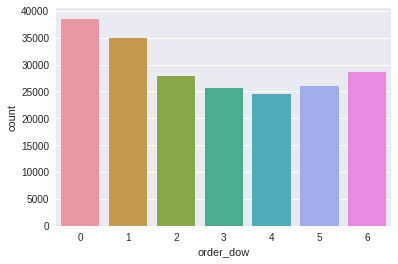

In [74]:
sns.countplot(users_per_time['order_dow']);

0요일에 가장 많은 주문자수, 4요일에 가장 적은 주문자수를 보였다

### order_hour_of_day

* 시간별 구입 횟수를 보자

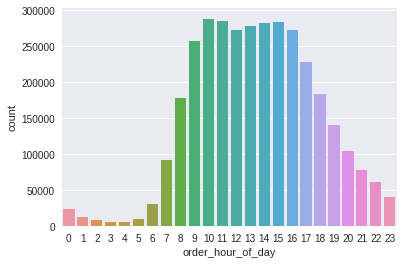

In [75]:
sns.countplot(orders.order_hour_of_day);

* 시간별 주문자 수를 보자

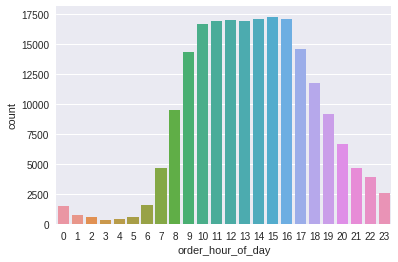

In [76]:
sns.countplot(users_per_time['order_hour_of_day']);

두경우 모두 10시에서 오후 4시정도 사이에 주문이 많았다
<br> 그냥 인터넷 쇼핑이었으면 더 저녁에 주문이 많았을 것 같은데
<br> 바로 배송오는 서비스라 낮에 주문량이 많은듯..

### order_dow & order_hour_of_day

* 시간별 주문 수를 보자

In [77]:
dow_hour = orders.groupby(['order_dow','order_hour_of_day']).count()
dow_hour = dow_hour['order_id']
dow_hour = dow_hour.unstack()

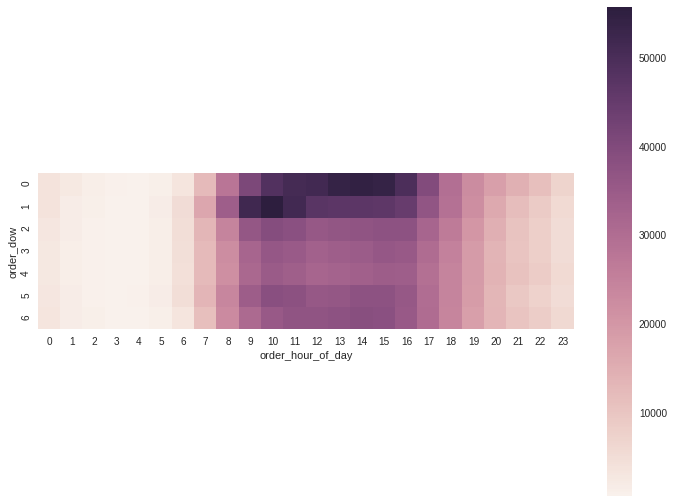

In [78]:
f, ax = plt.subplots(figsize =(12,9))
sns.heatmap(dow_hour, square = True);

요일과 시간별 주문 수를 heatmap으로 표현해보았다
<br> 0요일 13-15시와
<br> 1요일 10시정도에 주문수가 많음을 알 수 있었다

* 시간별 주문'자' 수를 보자

In [79]:
users_dow_hour = users_per_time.groupby(['order_dow','order_hour_of_day']).count()
users_dow_hour = users_dow_hour['user_id']
users_dow_hour = users_dow_hour.unstack()

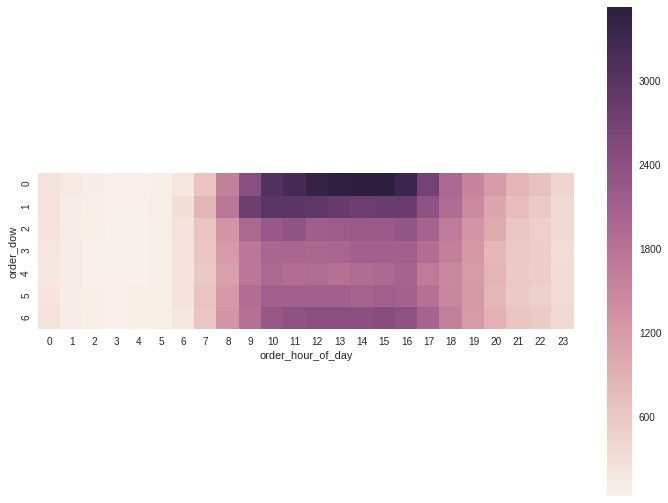

In [80]:
f, ax = plt.subplots(figsize =(12,9))
sns.heatmap(users_dow_hour, square = True);

1번 요일 10시 부근에 차이가 조금 나는 듯 하지만
<br> 위의 시간별 주문수와 전반적으로 비슷한 경향을 보임

### days_since_prior_order

몇일 후에 다시 주문하는가

orders의 days_since_prior_order에는 nan값이 존재한다. 
<br> 어떤 user의 첫 주문인 경우에는 nan으로 표시됨

#### user마다의 days_since_prior_order 보기

* user마다의 order_number와 days_since_prior_order 모두 찍기

In [81]:
order_sum_per_users = orders.groupby(['user_id']).count()['order_number']
# 유저의 order 횟수
reorder_mean_per_users = orders.groupby(['user_id']).mean()['days_since_prior_order']
# 유저의 재주문까지 걸린 기간의 평균

In [82]:
reorder = pd.concat([order_sum_per_users.to_frame(),reorder_mean_per_users.to_frame()], axis = 1)

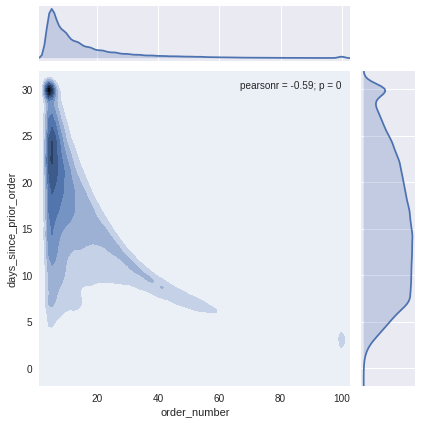

In [83]:
sns.jointplot(x = reorder.order_number, y =reorder.days_since_prior_order, kind='kde');

order_number가 작을때는 모르겠지만, 
<br> order_number가 큰(주문횟수가 많은) 사람들이 
<br>더 자주 시켰음을 알 수 있다

또한, 30일 이상의 기간 후에 재주문한 사람과
<br> 23-24일 후에 재주문한 사람들이 많음을 알 수 있다

* order_number 별 days_since_prior의 평균을 찍기

In [84]:
reorder2 = reorder.groupby(['order_number']).mean().reset_index()
# order_number별 days_since_prior의 평균을 담음

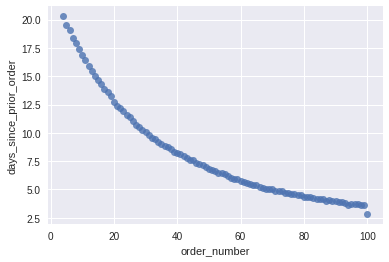

In [85]:
sns.regplot(x=reorder2["order_number"], y=reorder2['days_since_prior_order'],fit_reg=False);

오 이렇게보니 확연히 주문수가 작은 유저일수록 평균적인 재주문 기간이 길고,
<br> 주문수가 큰 유저일수록 평균적인 재주문 기간이 짧다는 것을 확인할 수 있다

흠 근데 어떤 한 기간의 주문 자료에서 많이 주문한 사람이 당연히 자주 주문했겠군..

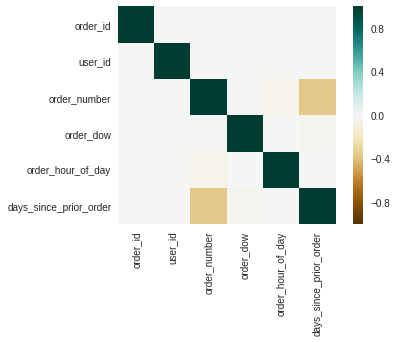

In [86]:
orders_corrmat = orders.corr()
sns.heatmap(orders_corrmat, square = True, cmap='BrBG');

orders 데이터 내에서 상관정도가 높은 변수들은 보이지 않았다
<br> order_number와 days_since_prior_order 사이의 상관계수가 음의 값이 나왔다
<br> 이 두 변수가 음의 상관관계를 갖고 있음을 위의 scatter plot과 heatmap에서 모두 확인할 수 있었다

---

## products

In [88]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


aisle과 department가 id만으로 표시가 되어있으니,
<br> aisles와 departments dataframe을 더해주자

In [90]:
print("aisle 갯수 : "+str(len(aisles)))
aisles.head(3)

aisle 갯수 : 134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars


In [92]:
print("department 갯수 : "+str(len(departments)))
departments.head(3)

department 갯수 : 21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery


---

## Data 합치기

### products3 = products + aisles + departments

##### 병합 전 nan값 확인

In [122]:
products.isnull().any()

product_id       False
product_name     False
aisle_id         False
department_id    False
dtype: bool

In [123]:
aisles.isnull().any()

aisle_id    False
aisle       False
dtype: bool

In [124]:
departments.isnull().any()

department_id    False
department       False
dtype: bool

nan값이 세 dataframe에 다 없음을 확인했고, 붙이기!

##### aisles_id에 맞추어 aisles 붙이기

In [125]:
products2 = pd.merge(products, aisles)
#products2 = products + aislesb
products2.head(3)

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes
2,102,Danish Butter Cookies,61,19,cookies cakes


##### department_id에 맞추어 department 붙이기

In [126]:
products3 = pd.merge(products2, departments)
# product3 = product + aisles + departments
products3.head(3)

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks


이제 order products , orders, products3 이렇게 세가지의 data만 남음

### total order = order products + orders

order_products_prior 에 order_id column을 사용해서병합

##### 병합전 결측치 확인

In [128]:
order_products_prior.isnull().any()

order_id             False
product_id           False
add_to_cart_order    False
reordered            False
dtype: bool

In [129]:
orders.isnull().any()
# 일단 eval_set 별로 나누기전에서 결측치를 확인함

order_id                  False
user_id                   False
eval_set                  False
order_number              False
order_dow                 False
order_hour_of_day         False
days_since_prior_order     True
dtype: bool

orders의 days_since_prior_order에 결측치가 있음 (첫 구매시 nan)

In [130]:
orders.eval_set.unique()

array(['prior', 'train', 'test'], dtype=object)

In [131]:
orders_prior = orders[orders.eval_set == 'prior']
orders_train = orders[orders.eval_set == 'train']
orders_test = orders[orders.eval_set == 'test']

In [132]:
total_orders_prior = pd.merge(order_products_prior, orders_prior)
total_orders_train = pd.merge(order_products_train, orders_train)
total_orders_prior.head(3)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0


이제 결과적으로 total_orders 라는 데이터와 product라는 데이터 두가지만 남았다.
* total_orders를 통해 상품을 제외한 주문에 관련된 모든 정보를 파악 가능하다
* 상품에 대한 정보를 보고싶을때만 product를 참고하면 된다

product_id를 사용하여 total_orders data에 product3 데이터도 붙일까 생각했지만 이미 데이터가 너무 커서 오래걸린당..

---

## 합친 데이터에서의 EDA

orders 데이터를 product_order 데이터에 합치면서, 

* user기준 뿐만이 아닌
* 상품을 기준으로 했을때의 주문 요일, 주문시각, 재주문률등을 파악할 수 있게됨

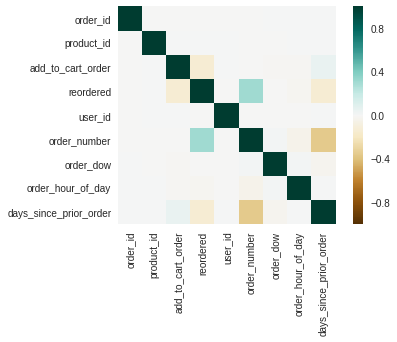

In [133]:
total_corr = total_orders_prior.corr()
sns.heatmap(total_corr, square = True, cmap='BrBG');

order_number과 reordered 사이에 양의 상관관계가..?!

#### order_number & reordered

In [134]:
# x축에 쓰일 order_num 
total_ordernum = total_orders_prior.groupby(['order_id']).mean().order_number
# y축에 쓰일 reordered 된 상품의 비율
total_reordered = total_orders_prior.groupby(['order_id']).mean().reordered

In [135]:
total_ordernum_reordered = pd.concat([total_ordernum.to_frame(),total_reordered.to_frame()], axis = 1)

In [136]:
# sns.jointplot(x = total_ordernum_reordered.order_number, y= total_ordernum_reordered.reordered,kind='kde');
# 위의 그래프를 그리려 했으나 아무리 기다려도 돌아가지 않음..

In [138]:
total_ordernum_reordered = total_ordernum_reordered.groupby('order_number').mean().reset_index()
# order_number마다의 reordered 비율의 평균을 구함

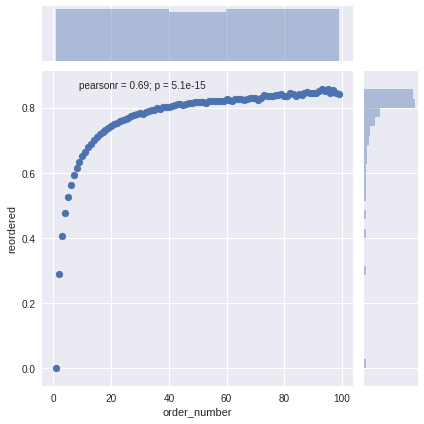

In [139]:
sns.jointplot(x = total_ordernum_reordered.order_number,
              y = total_ordernum_reordered.reordered);

* order_number이 커질수록 reordered 한 상품이 비율이 올라감
* 40번 이상 주문한 사람의 경우, 주문한 상품들 중 재주문한 상품의 비율의 평균이 80퍼센트를 넘는다


### product

많이 주문되는 product가 무엇인가

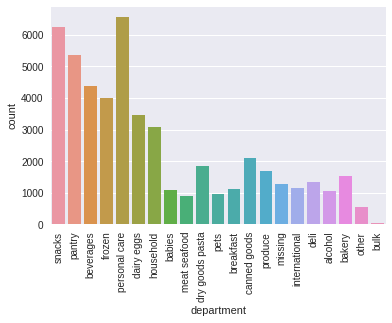

In [127]:
plt.xticks(rotation=90)
sns.countplot(products3.department);

aisles는 너무 종류가많아서 일단 각 department의 product 수를 나타내보았다
<br> snacks와 personal care department에 상품수가 가장 많다

In [183]:
product_ranking = order_products_prior
product_ranking['temp']= 1

In [241]:
product_ranking15 = product_ranking.groupby('product_id').sum().temp.sort_values(ascending = False)[:15]
# 가장많이 팔린 상위 15개 상품을 뽑아봄

In [304]:
product_ranking_15 = product_ranking15.to_frame().reset_index()

In [305]:
product_ranking_name15 = pd.DataFrame(columns = ['product_id', 'product_name', 'aisle_id', 'department_id', 'aisle',
       'department'])

In [306]:
for x in product_ranking_15['product_id']:
    product_ranking_name15 = pd.concat([product_ranking_name15, products3[products3.product_id == x]])

In [310]:
total_rank15 = pd.merge(product_ranking_15,product_ranking_name15)
total_rank15

,product_id,temp,product_name,aisle_id,department_id,aisle,department
0,24852,472565,Banana,24.0,4.0,fresh fruits,produce
1,13176,379450,Bag of Organic Bananas,24.0,4.0,fresh fruits,produce
2,21137,264683,Organic Strawberries,24.0,4.0,fresh fruits,produce
3,21903,241921,Organic Baby Spinach,123.0,4.0,packaged vegetables fruits,produce
4,47209,213584,Organic Hass Avocado,24.0,4.0,fresh fruits,produce
5,47766,176815,Organic Avocado,24.0,4.0,fresh fruits,produce
6,47626,152657,Large Lemon,24.0,4.0,fresh fruits,produce
7,16797,142951,Strawberries,24.0,4.0,fresh fruits,produce
8,26209,140627,Limes,24.0,4.0,fresh fruits,produce
9,27845,137905,Organic Whole Milk,84.0,16.0,milk,dairy eggs


한눈에 봐도 가장 많이 팔린 상품 15개의 경우, fresh fruits aisle인 경우가 많은 것을 확인할 수 있다
<br>produce department에 가장 많이팔린 상품들이 포진해있었다.

그러나 아까 department별 팔린 상품의 갯수를 보았을때는 produce가 부진했음. 왜지?


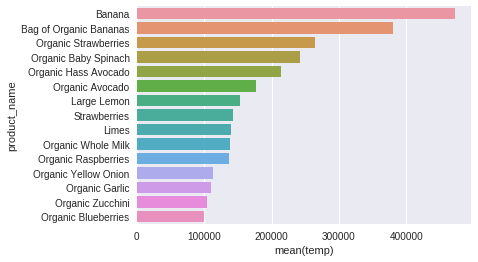

In [315]:
# plt.subplots(figsize=(15,20))
sns.barplot(x= total_rank15.temp, y = total_rank15.product_name);

주문량이 가장 많은 것은 바나나였다..!
<br>그다음은 딸기..! 그냥 딸기보다 유기농 딸기를 더많이 주문했다 껄껄

#### product & reordered

많이 재주문되는 product가 무엇인지 알아보쟈

In [329]:
total_reorder = total_orders_prior.groupby('product_id').mean()['reordered']
total_reorder = total_reorder.sort_values(ascending = False)[:9]
total_reorder
# 평균적으로 90퍼 이상 재주문을 하게되는 마성의 상품들

product_id
6433     0.941176
2075     0.931034
43553    0.923077
27740    0.920792
14609    0.914286
13875    0.911111
39992    0.909091
31418    0.900000
35604    0.900000
Name: reordered, dtype: float64

In [330]:
total_reorder = total_reorder.to_frame().reset_index()

In [331]:
total_reorder10 = pd.DataFrame(columns = ['product_id', 'product_name', 'aisle_id', 'department_id', 'aisle',
       'department'])

In [333]:
for x in total_reorder['product_id']:
    total_reorder10 = pd.concat([total_reorder10, products3[products3.product_id == x]])

In [336]:
total_reorder_10 = pd.merge(total_reorder,total_reorder10)
total_reorder_10

,product_id,reordered,product_name,aisle_id,department_id,aisle,department
0,6433,0.941176,Raw Veggie Wrappers,13.0,20.0,prepared meals,deli
1,2075,0.931034,Serenity Ultimate Extrema Overnight Pads,126.0,11.0,feminine care,personal care
2,43553,0.923077,Orange Energy Shots,64.0,7.0,energy sports drinks,beverages
3,27740,0.920792,Chocolate Love Bar,45.0,19.0,candy chocolate,snacks
4,14609,0.914286,Soy Powder Infant Formula,92.0,18.0,baby food formula,babies
5,13875,0.911111,Simply Sleep Nighttime Sleep Aid,6.0,2.0,other,other
6,39992,0.909091,"Energy Shot, Grape Flavor",64.0,7.0,energy sports drinks,beverages
7,31418,0.900000,Sparking Water,115.0,7.0,water seltzer sparkling water,beverages
8,35604,0.900000,Maca Buttercups,45.0,19.0,candy chocolate,snacks


재주문을 하게 되는 상품 10위를 보았을때 특정 aisle이나 department가 눈에 띄지는 않았다

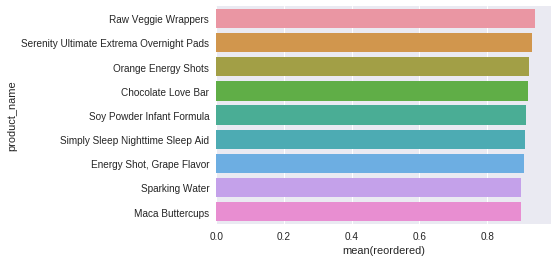

In [335]:
sns.barplot(x= total_reorder_10.reordered, y = total_reorder_10.product_name);

raw veggie wrappers.... 생 야채 쌈..?

2위는 생리대..! 하긴..! 생리대는 계속 쓰던거 사니까..! 오..!

Simply Sleep Nighttime Sleep Aid :
<br>
https://www.tylenol.com/products/simply-sleep-caplet
<br>타이레놀 수면제..! 이것도 쓰던 사람만 쓰는 것 같다

재주문률이 높은 물건들은 사던사람이 계속 사는 물건들이므로 이것을 이용해서 예측 가능할듯..!
